In [1]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark
import re

In [25]:
def generate():
  return [
    RandomParams(directed=True, num_vertices=50, average_degree=a) 
      for a in np.arange(1, 2.0, 0.1) for _ in range(10)
  ]

params_code = inspect.getsource(generate)
params_list = generate()

benchmark = new_random_benchmark(params_list, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
], params_code = params_code, override_benchmark_path="../benchmarks/test")

benchmark.benchmark_path

'../benchmarks/test(12)'

In [26]:
benchmark.run(retryFailures=False, timeout=10)


graph: 0.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 8e-06
graph: 1.txt, solver: brute('FAST_BOUND') ... 

✅
length: 14, run_time: 1.1e-05
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 1e-05
graph: 3.txt, solver: brute('FAST_BOUND') ... ✅
length: 6, run_time: 8e-06
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 1.3e-05
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 1e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 1.7e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 12, run_time: 1.1e-05
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 11, run_time: 1e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 6, run_time: 1.2e-05
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 18, run_time: 1.2e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 10, run_time: 1.2e-05
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.6e-05
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 14.txt, solver: brute('FAST_BOUND') ..

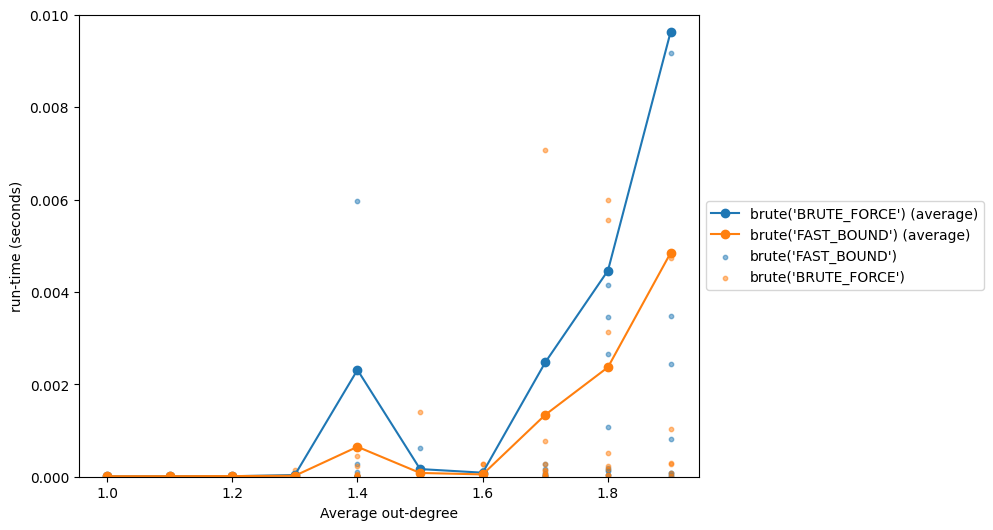

In [27]:
name = os.path.splitext(os.path.basename(benchmark.benchmark_path))[0]

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]
# pd.DataFrame(results)
solver_names

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])
df["average_degree"] = df["graph_id"].apply(lambda id: graph_infos[id]['average_degree'])

view = df[['average_degree', 'solver_name','length', 'run_time']]

df.groupby(['average_degree', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
    .pivot(index='average_degree', columns='solver_name', values='run_time') \
    .rename(columns=lambda x: x + " (average)") \
    .plot(style="o-") \

for solver_name in solver_names:
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(solver_df['average_degree'], solver_df['run_time'], label=solver_name, alpha=0.5, s=10)

# plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out-degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
plt.ylim(0, 0.010)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [3]:
benchmark = Benchmark.load("../benchmarks/rob-top2000")
name = os.path.splitext(os.path.basename(benchmark.benchmark_path))[0]

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])

ax = df.plot.bar(x="solver_name", y="run_time") \

for i, value in enumerate(df["run_time"]):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')  # Display value at the top of the bar


ax.tick_params(axis='x', labelrotation=0)
plt.ylabel("run-time (seconds)")
plt.title("Longest path solve-time for Top 2000 songs graph")

plt.gcf().set_size_inches(12, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../benchmarks/rob-top2000/info.json'